In [11]:
#data set
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\1257901603.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


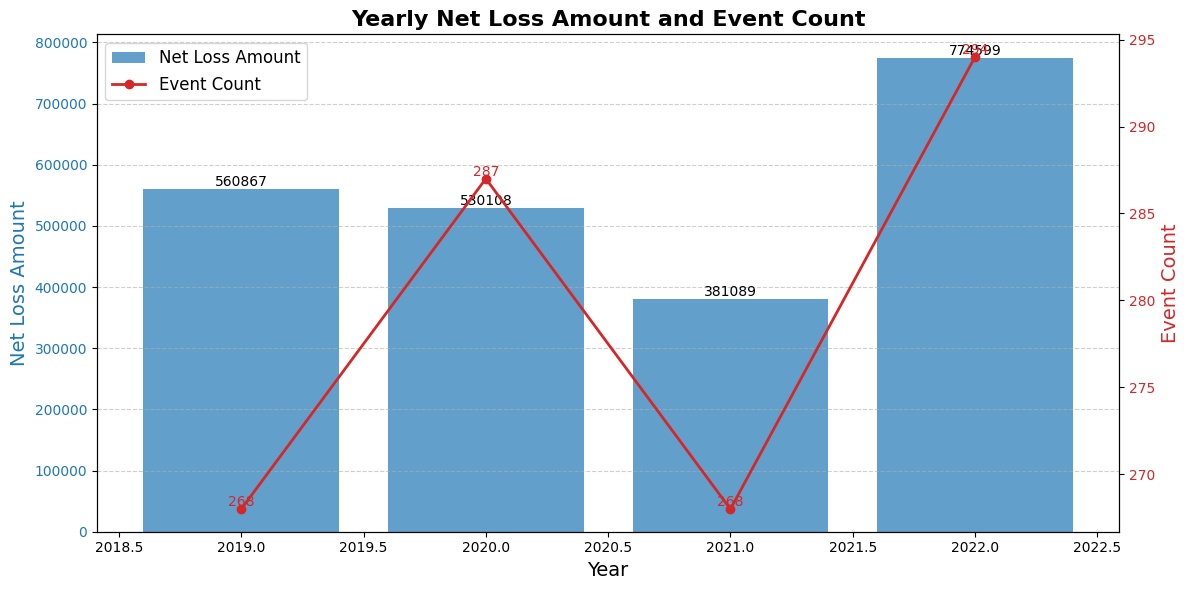

In [12]:
#only value on bar chart not line chart
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss and Event Count
yearly_data = df.groupby('Year').agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Net Loss on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net Loss Amount', color=color, fontsize=14)
bars = ax1.bar(
    yearly_data['Year'], 
    yearly_data['Net Loss Amount'], 
    color=color, 
    alpha=0.7, 
    label='Net Loss Amount'
)
# Add data labels to the bars
for bar, value in zip(bars, yearly_data['Net Loss Amount']):
    ax1.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{value:.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Event Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Event Count', color=color, fontsize=14)
line = ax2.plot(
    yearly_data['Year'], 
    yearly_data['Event Count'], 
    color=color, 
    marker='o', 
    linewidth=2, 
    label='Event Count'
)
# Add data labels to the line chart
for x, y in zip(yearly_data['Year'], yearly_data['Event Count']):
    ax2.text(x, y, f'{y}', color=color, fontsize=10, ha='center', va='bottom')
ax2.tick_params(axis='y', labelcolor=color)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Add gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add a title
plt.title('Yearly Net Loss Amount and Event Count', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\3330172675.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


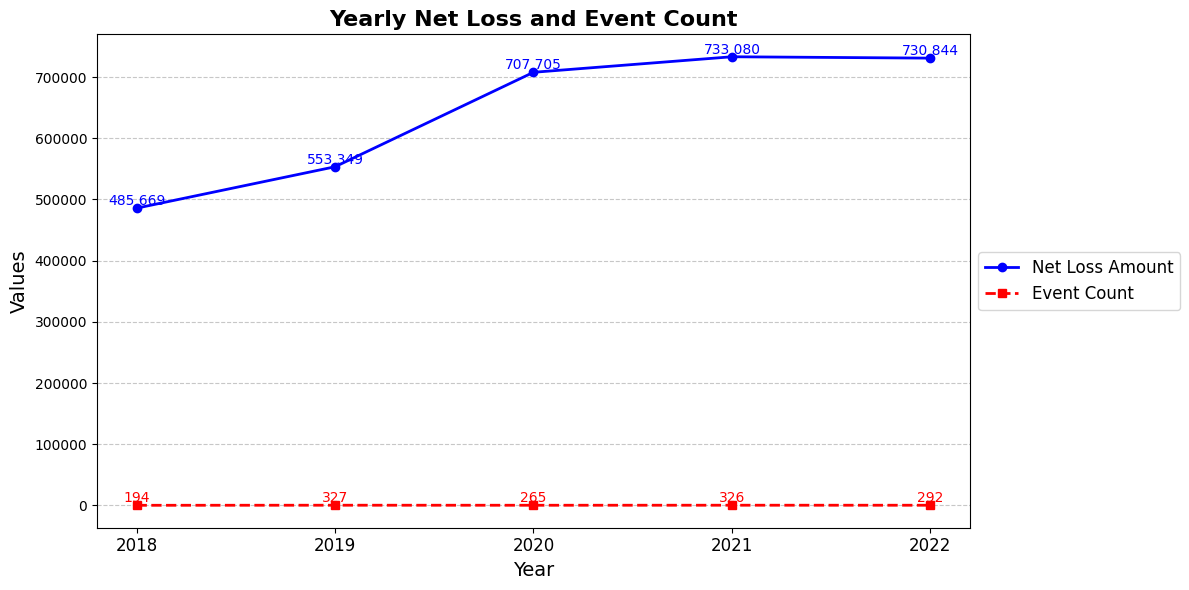

In [13]:
#only value but line chart for both
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss and Event Count
yearly_data = df.groupby('Year').agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Net Loss Amount
plt.plot(
    yearly_data['Year'], 
    yearly_data['Net Loss Amount'], 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Net Loss Amount', 
    color='blue'
)

# Plot Event Count
plt.plot(
    yearly_data['Year'], 
    yearly_data['Event Count'], 
    marker='s', 
    linestyle='--', 
    linewidth=2, 
    label='Event Count', 
    color='red'
)

# Add labels to data points for both lines
for x, y in zip(yearly_data['Year'], yearly_data['Net Loss Amount']):
    plt.text(x, y, f'{y:,}', color='blue', fontsize=10, ha='center', va='bottom')

for x, y in zip(yearly_data['Year'], yearly_data['Event Count']):
    plt.text(x, y, f'{y}', color='red', fontsize=10, ha='center', va='bottom')

# Customize the x-axis
plt.xticks(yearly_data['Year'], fontsize=12)  # Ensure proper year labels
plt.xlabel('Year', fontsize=14)

# Add labels for the y-axis
plt.ylabel('Values', fontsize=14)

# Add a title
plt.title('Yearly Net Loss and Event Count', fontsize=16, fontweight='bold')

# Add a legend to the right side of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit the legend
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\1194291414.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


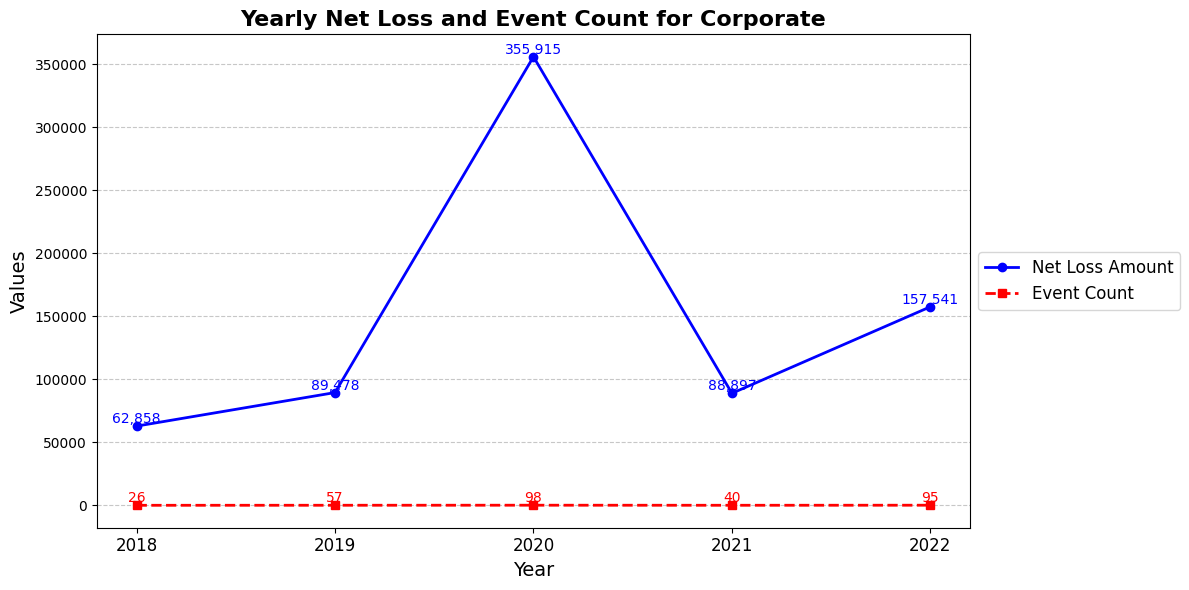

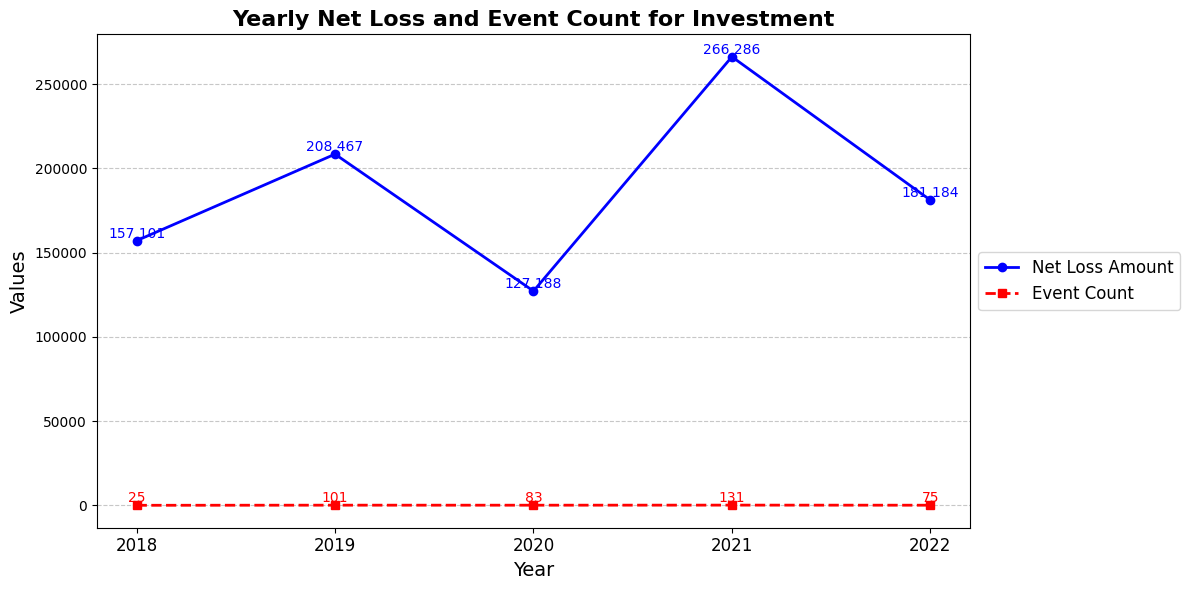

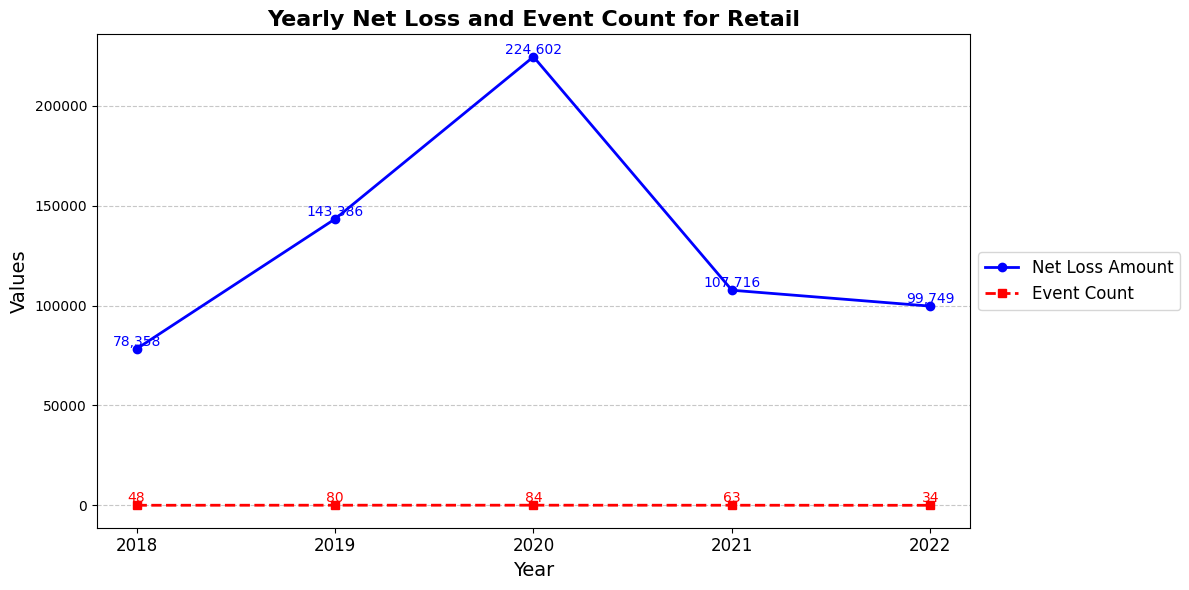

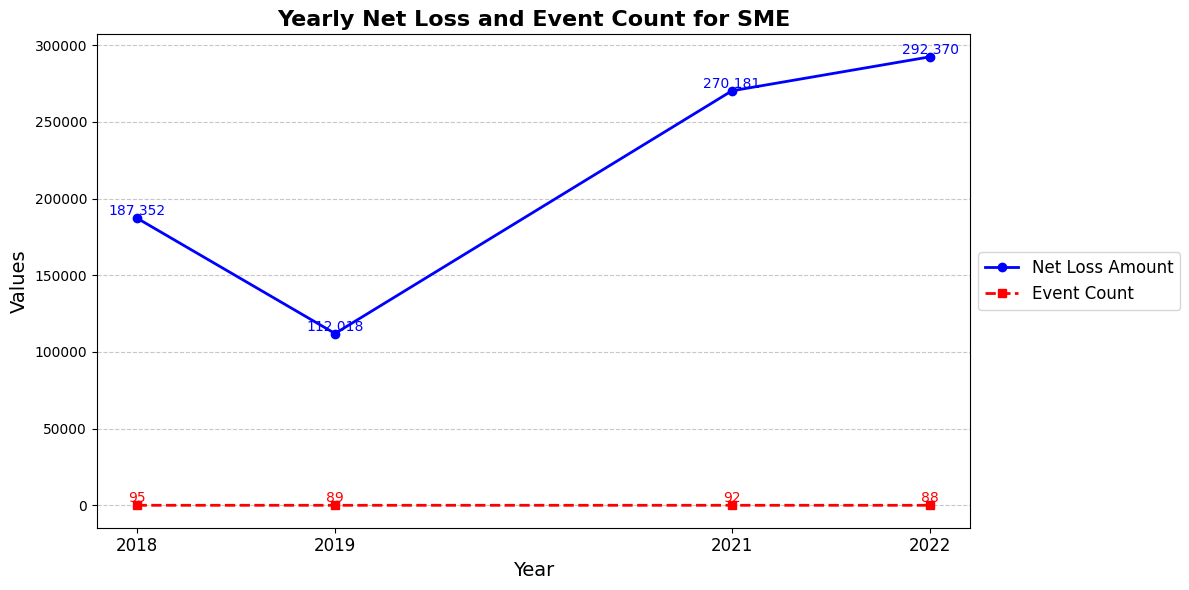

In [14]:
#only value line chart for both and all bisoness line
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Add labels to data points for both lines
    for x, y in zip(line_data['Year'], line_data['Net Loss Amount']):
        plt.text(x, y, f'{y:,}', color='blue', fontsize=10, ha='center', va='bottom')

    for x, y in zip(line_data['Year'], line_data['Event Count']):
        plt.text(x, y, f'{y}', color='red', fontsize=10, ha='center', va='bottom')

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\3314955238.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


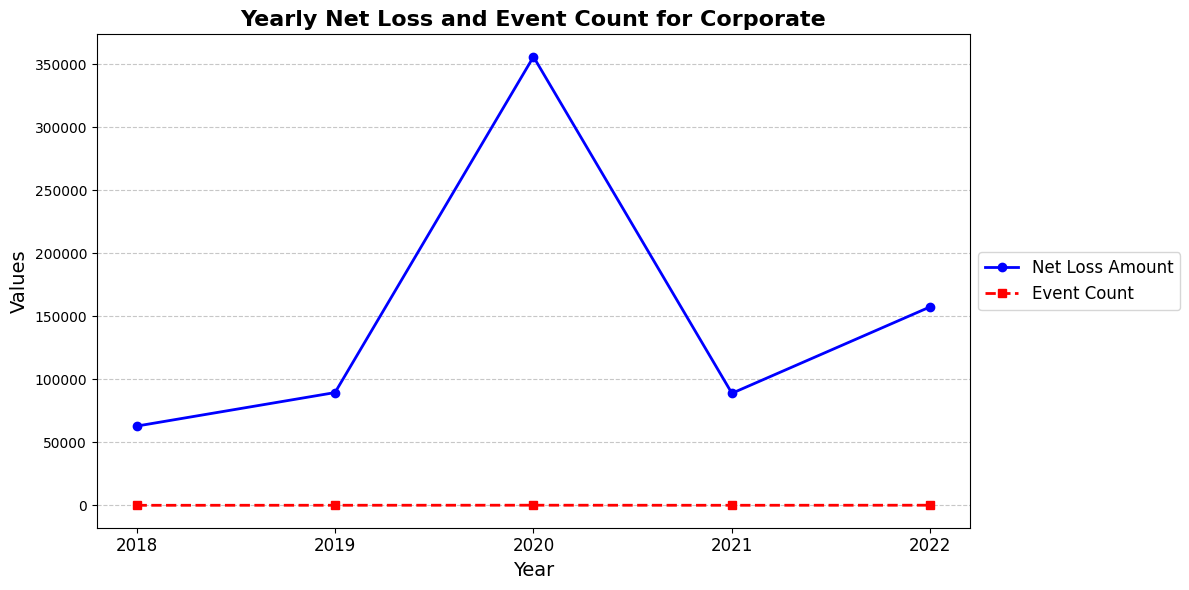

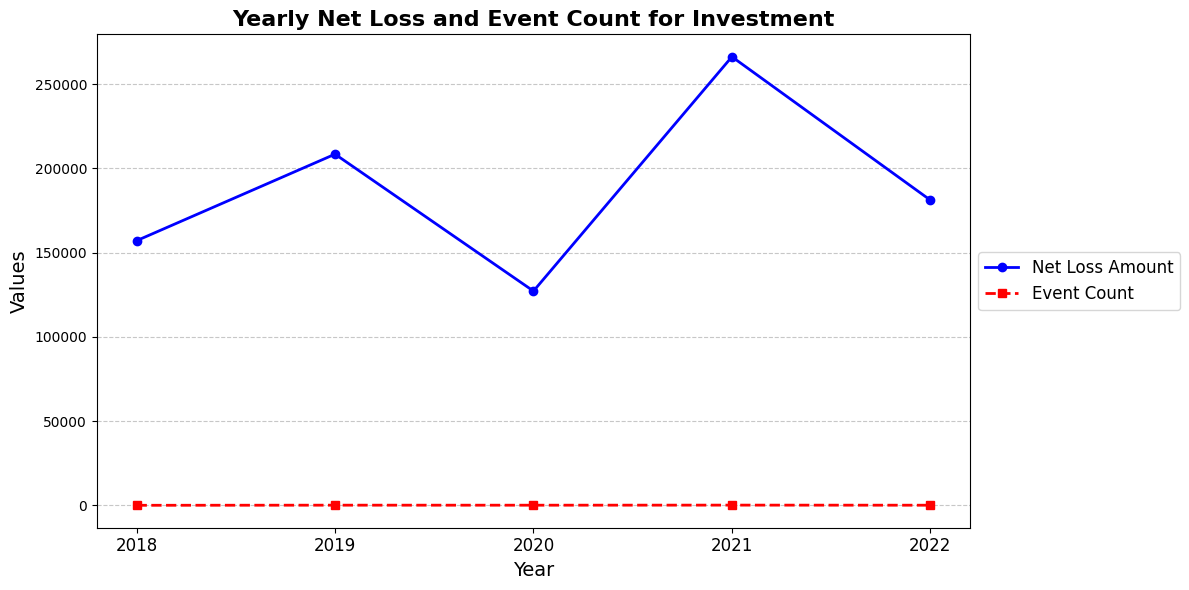

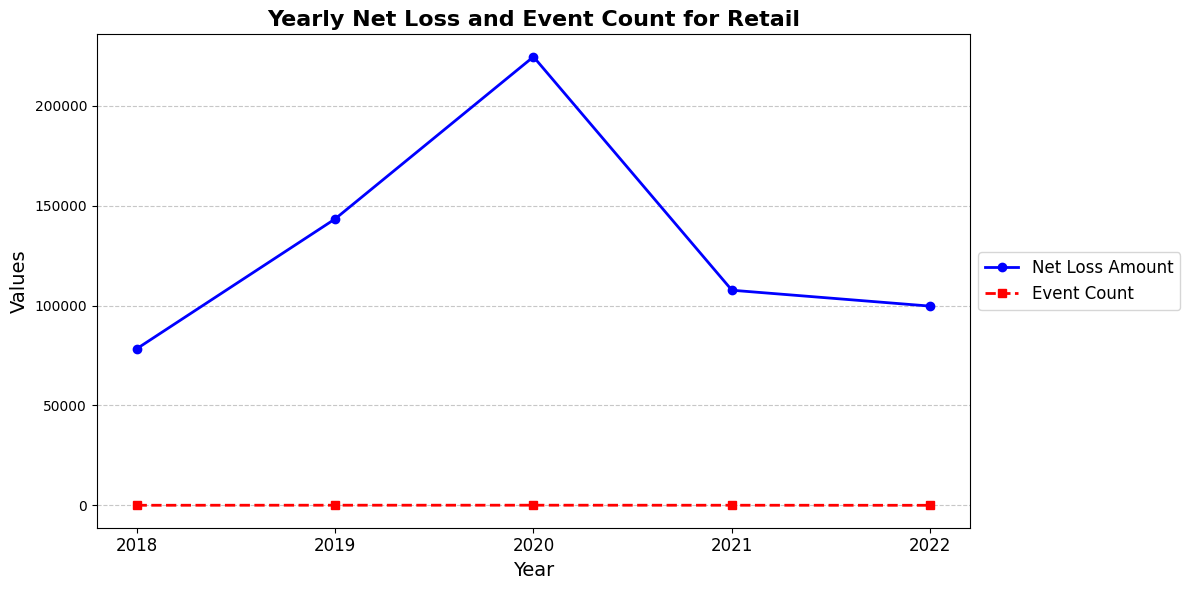

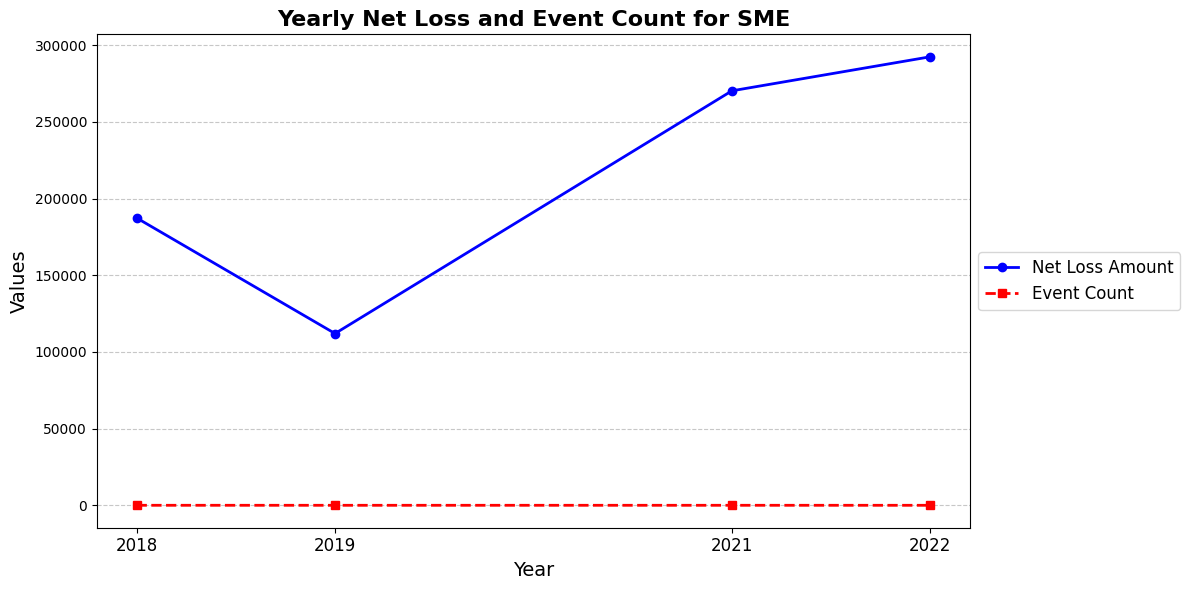

In [15]:
#all business line without label value and per but line chart
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\2944650361.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


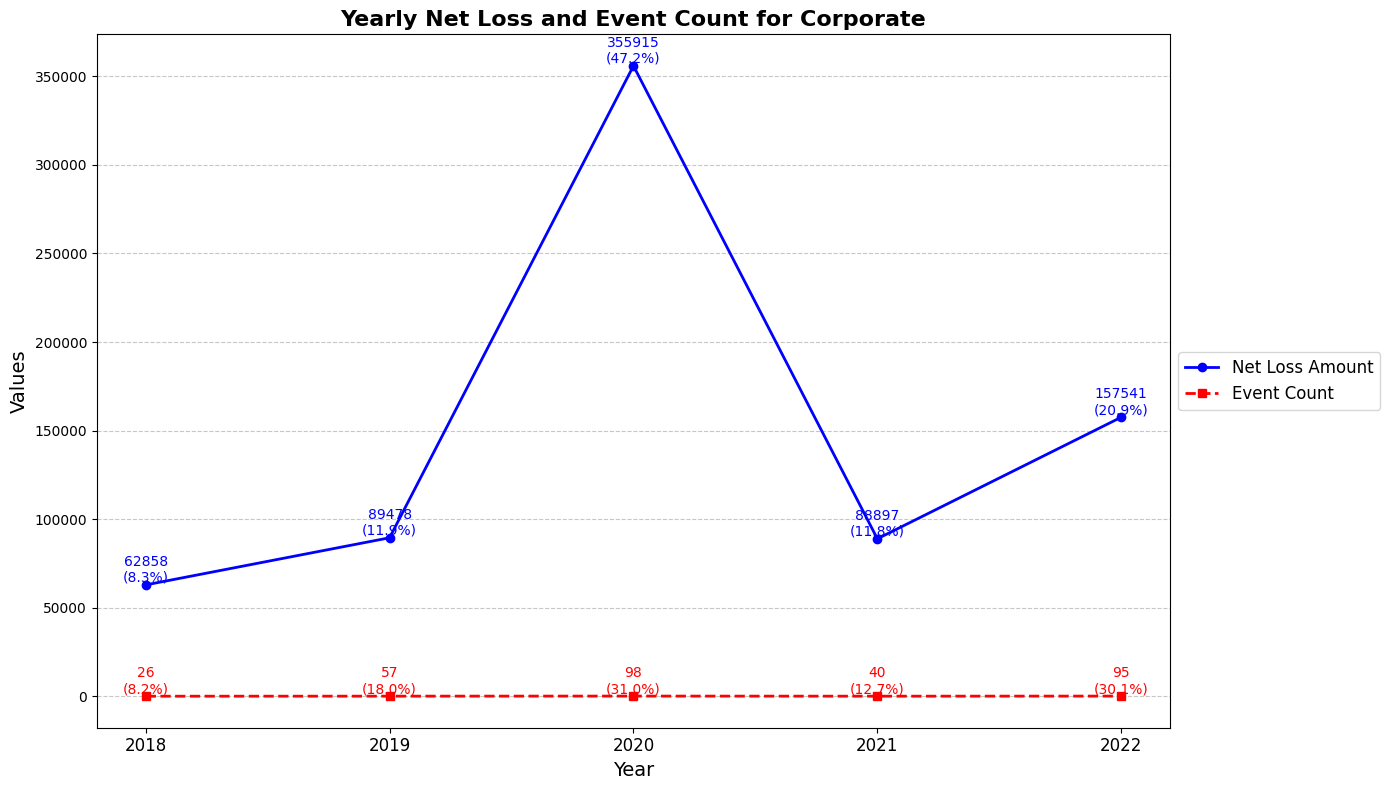

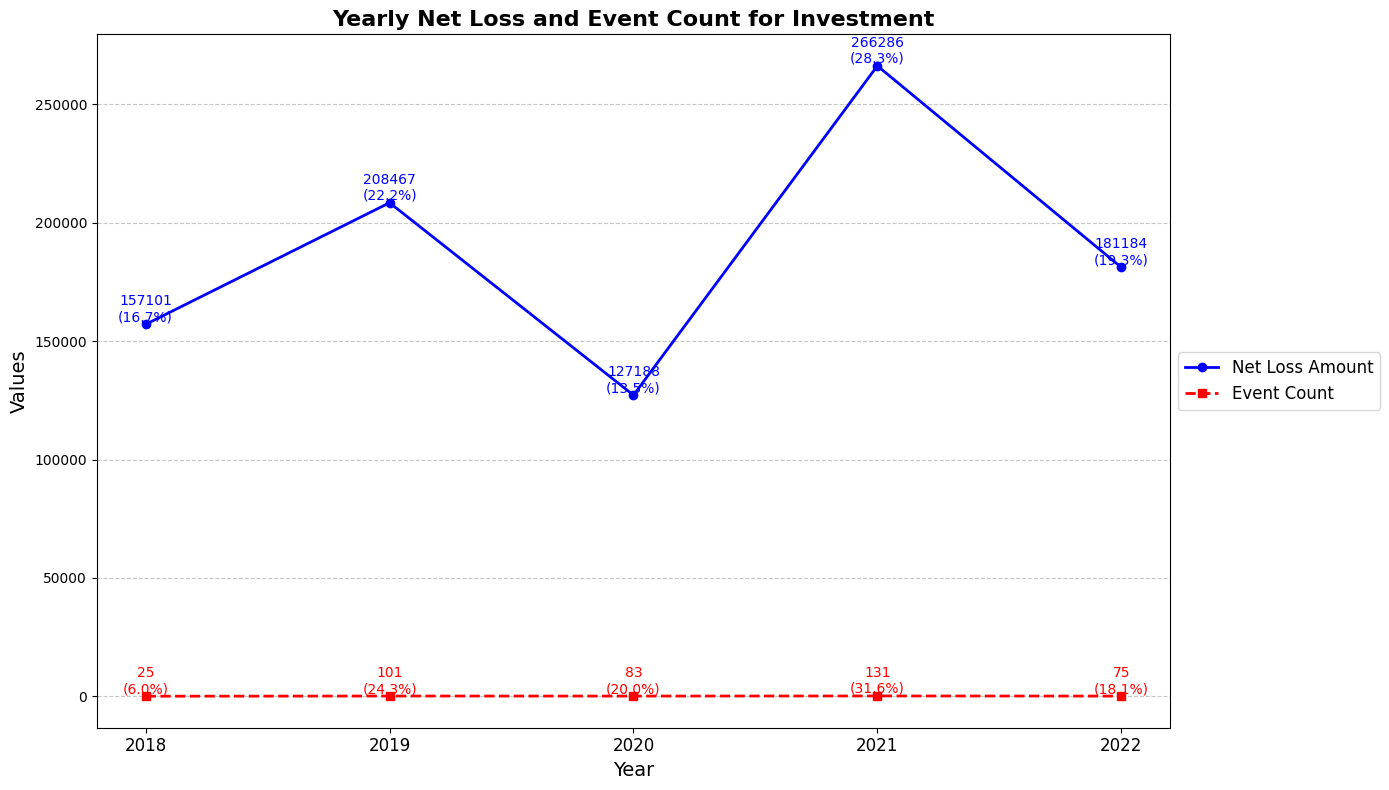

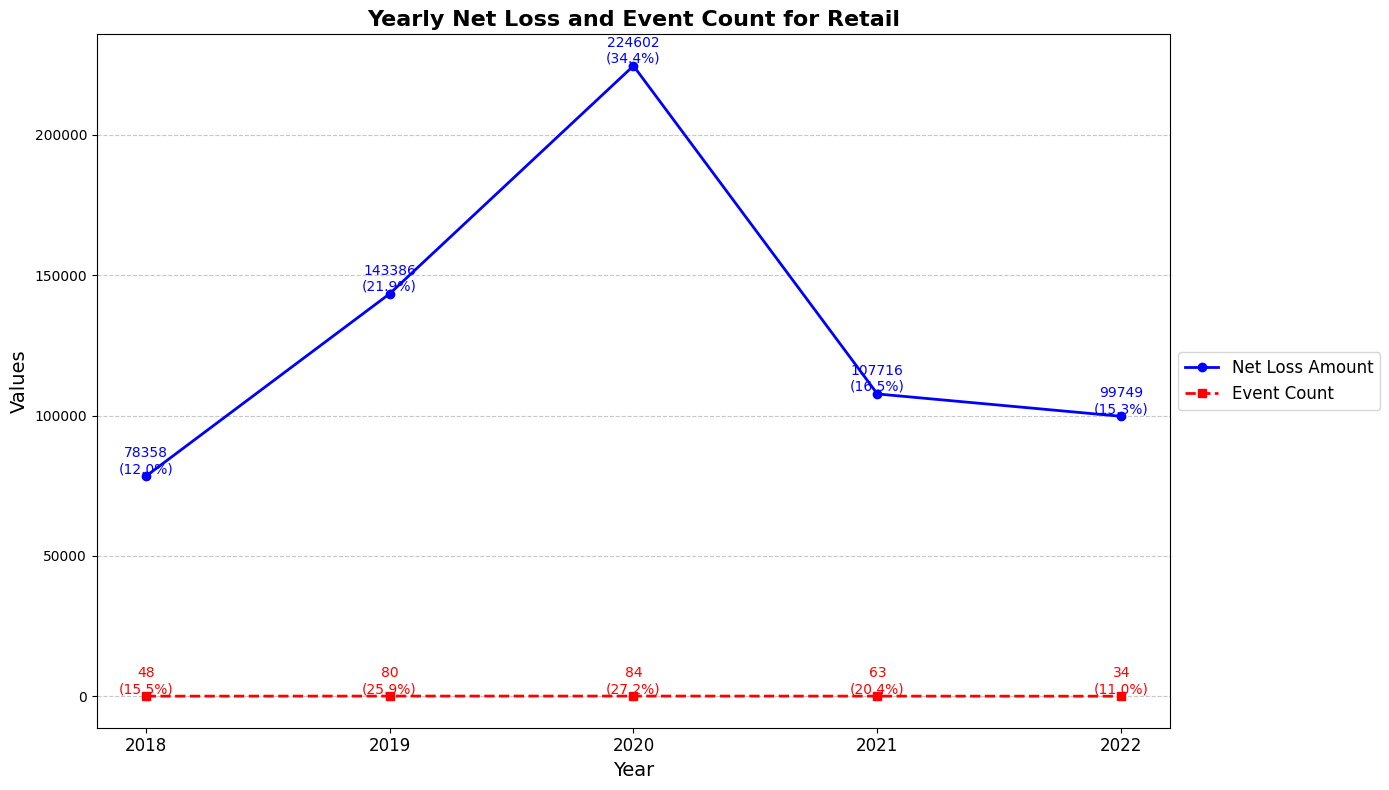

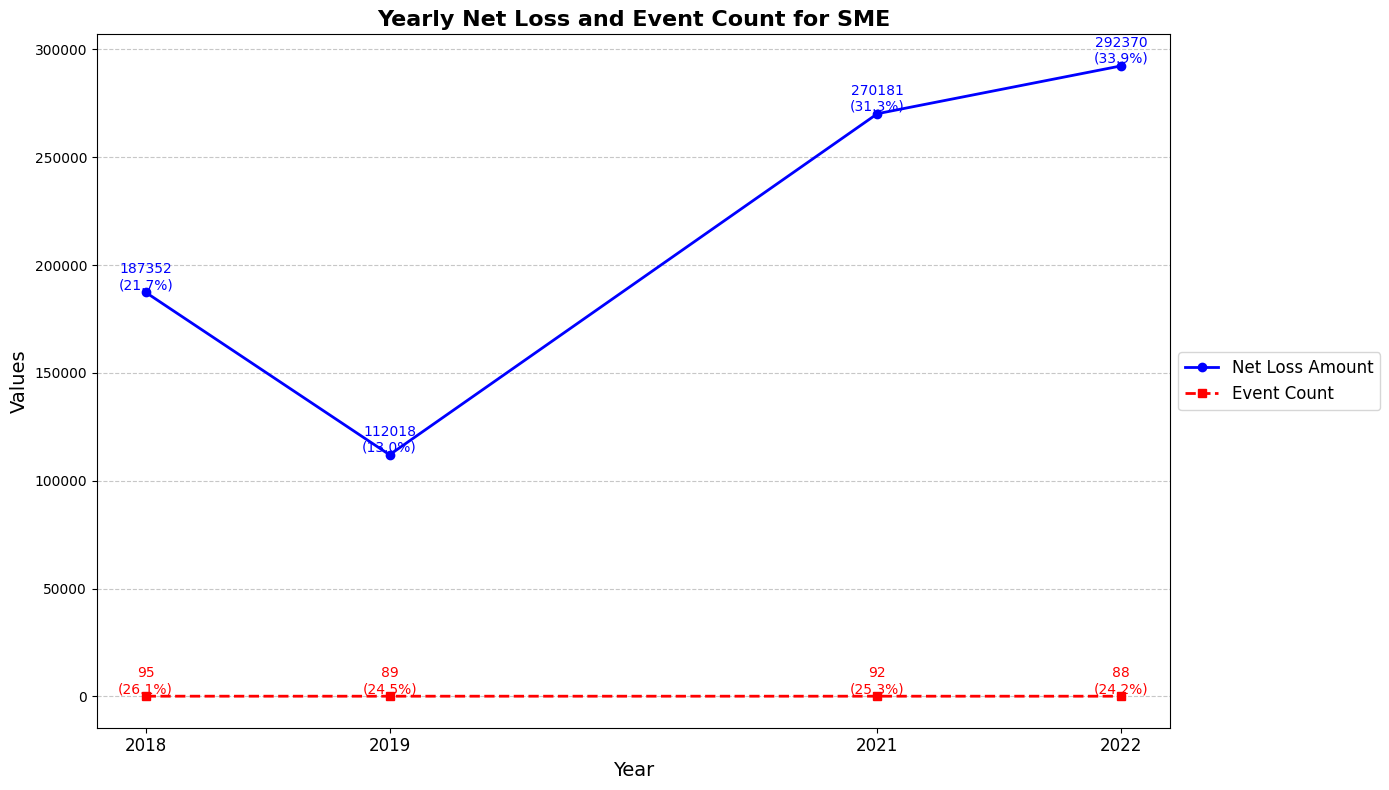

In [16]:

#for all the business line both line chart pernt and value **************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Calculate total values for percentages
total_net_loss = grouped_data.groupby('Business Line')['Net Loss Amount'].transform('sum')
total_event_count = grouped_data.groupby('Business Line')['Event Count'].transform('sum')
grouped_data['Net Loss Percentage'] = (grouped_data['Net Loss Amount'] / total_net_loss) * 100
grouped_data['Event Count Percentage'] = (grouped_data['Event Count'] / total_event_count) * 100

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(14, 8))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Add labels for Net Loss and Event Count
    for x, y, pct in zip(line_data['Year'], line_data['Net Loss Amount'], line_data['Net Loss Percentage']):
        plt.text(x, y, f'{y:.0f}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10, color='blue')

    for x, y, pct in zip(line_data['Year'], line_data['Event Count'], line_data['Event Count Percentage']):
        plt.text(x, y, f'{y:.0f}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10, color='red')

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\2793158187.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


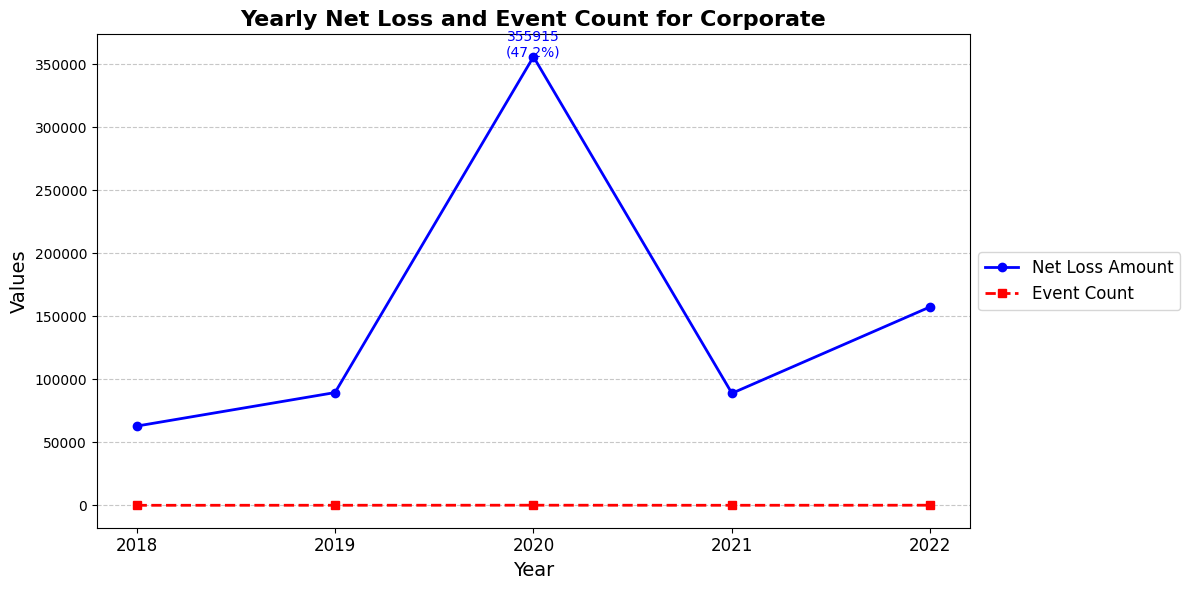

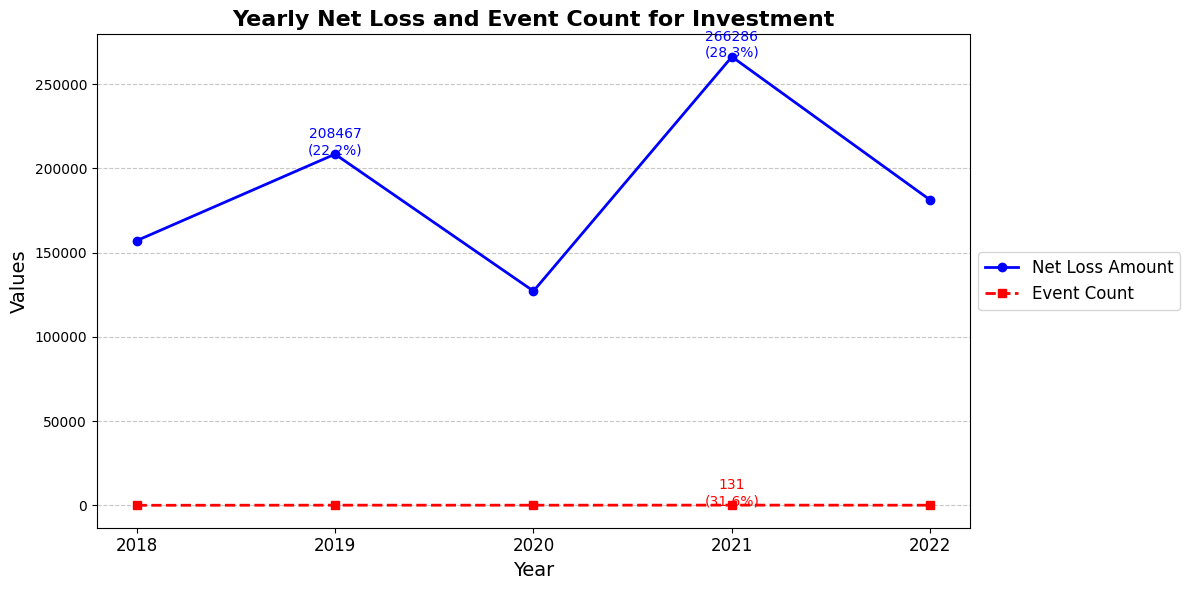

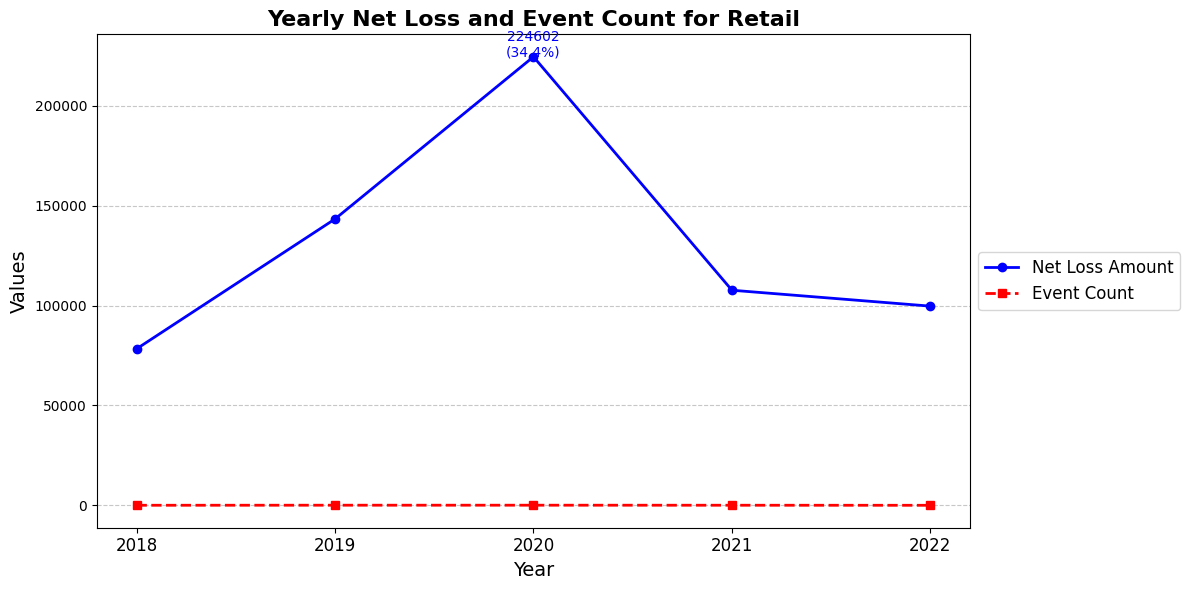

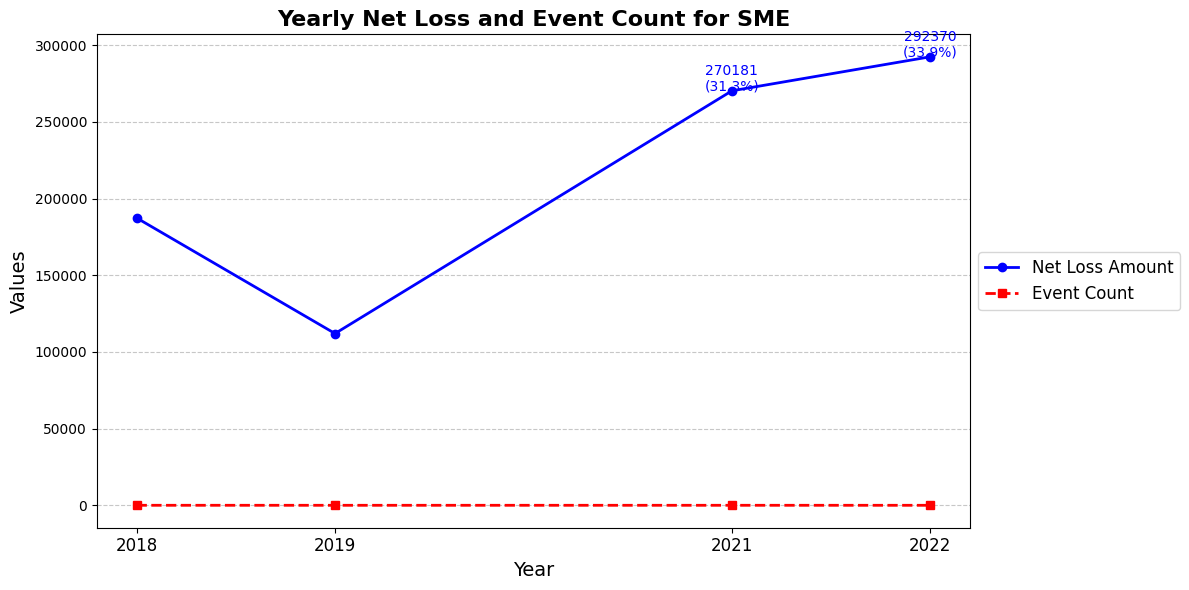

In [17]:
#only for some threshold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Define thresholds
net_loss_threshold = 200000
event_count_threshold = 120

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Annotate Net Loss Amount if above the threshold
    for x, y in zip(line_data['Year'], line_data['Net Loss Amount']):
        if y > net_loss_threshold:
            percentage = (y / line_data['Net Loss Amount'].sum()) * 100
            plt.text(
                x, y, f'{y:.0f}\n({percentage:.1f}%)',
                fontsize=10,
                color='blue',
                ha='center'
            )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Annotate Event Count if above the threshold
    for x, y in zip(line_data['Year'], line_data['Event Count']):
        if y > event_count_threshold:
            percentage = (y / line_data['Event Count'].sum()) * 100
            plt.text(
                x, y, f'{y:.0f}\n({percentage:.1f}%)',
                fontsize=10,
                color='red',
                ha='center'
            )

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\2808003833.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


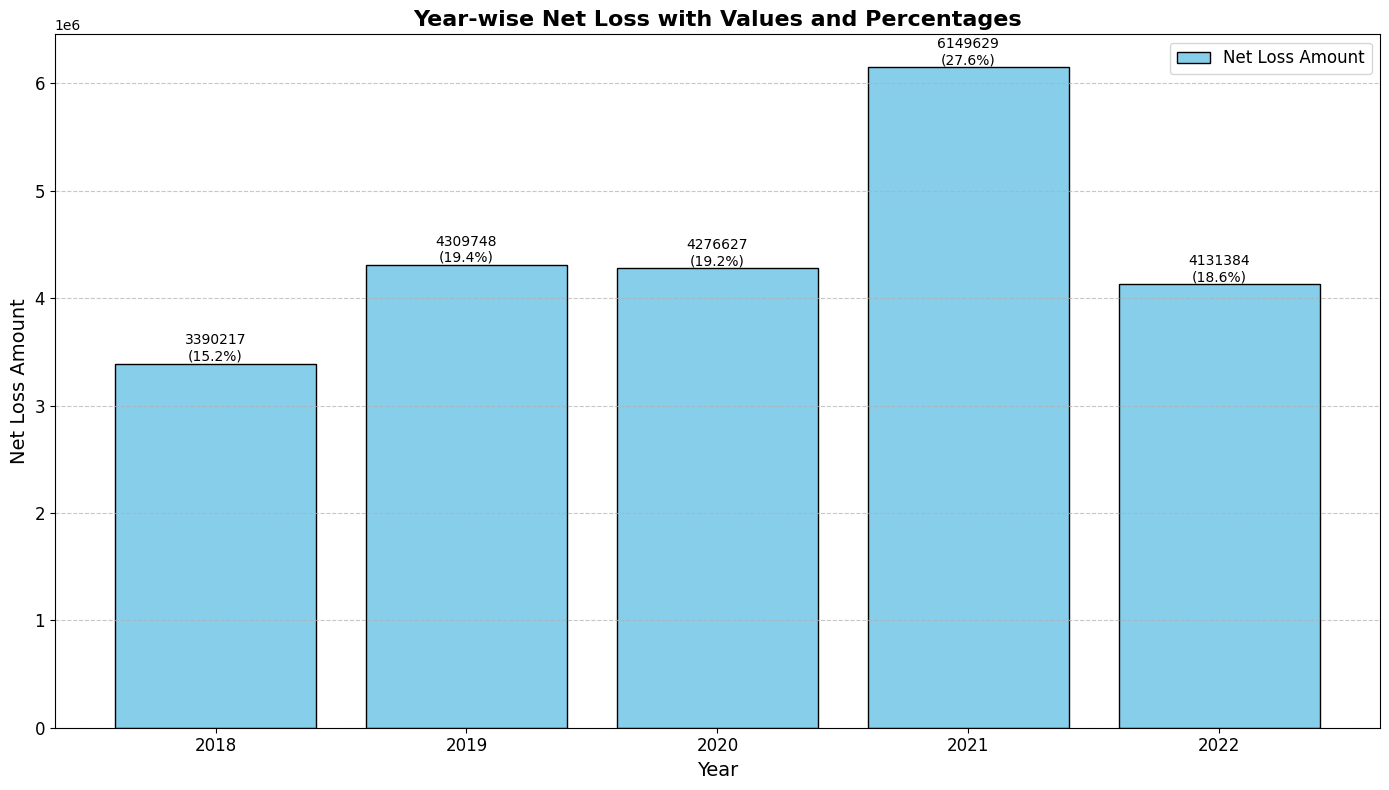

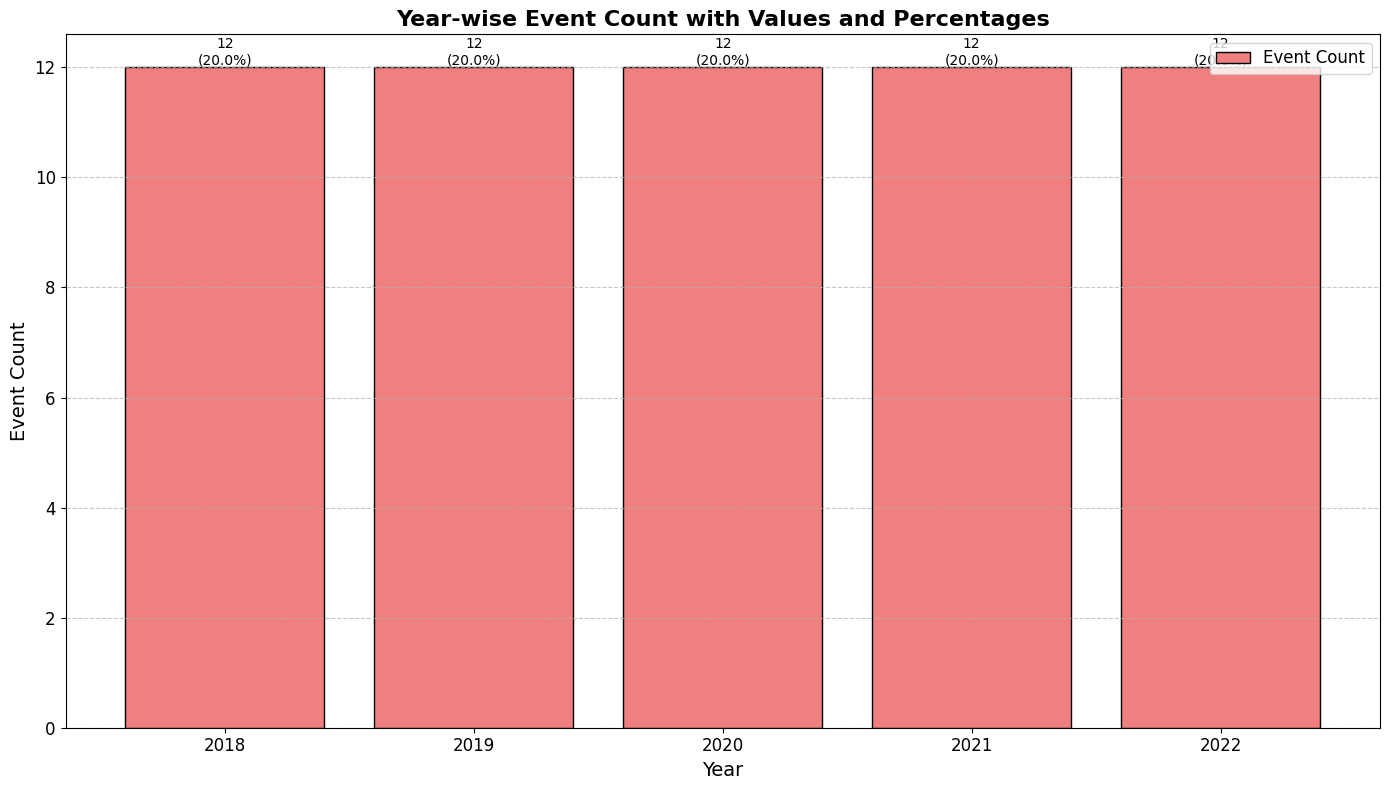

In [18]:

#slide one #percentage and value  yearwise loss and event countg seprate grapgh for both
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Net Loss Amount': np.random.randint(-100000, 1000000, size=60)
}
df = pd.DataFrame(data)

# Ensure all Net Loss Amounts are positive
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()

# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss and Event Count
yearly_summary = df.groupby('Year').agg({
    'Net Loss Absolute': 'sum',
    'Date': 'count'  # Event count
}).rename(columns={'Date': 'Event Count'}).reset_index()

# Calculate percentages for Net Loss and Event Count
total_net_loss = yearly_summary['Net Loss Absolute'].sum()
yearly_summary['Net Loss Percentage'] = (yearly_summary['Net Loss Absolute'] / total_net_loss) * 100

total_event_count = yearly_summary['Event Count'].sum()
yearly_summary['Event Count Percentage'] = (yearly_summary['Event Count'] / total_event_count) * 100

# --- Bar Chart for Net Loss ---
plt.figure(figsize=(14, 8))
bars = plt.bar(
    yearly_summary['Year'].astype(str),
    yearly_summary['Net Loss Absolute'],
    color='skyblue',
    edgecolor='black',
    label='Net Loss Amount'
)

# Add labels to each bar (Net Loss Value and Percentage)
for bar, value, percentage in zip(bars, yearly_summary['Net Loss Absolute'], yearly_summary['Net Loss Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Year-wise Net Loss with Values and Percentages', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Loss Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Bar Chart for Event Count ---
plt.figure(figsize=(14, 8))
bars = plt.bar(
    yearly_summary['Year'].astype(str),
    yearly_summary['Event Count'],
    color='lightcoral',
    edgecolor='black',
    label='Event Count'
)

# Add labels to each bar (Event Count Value and Percentage)
for bar, value, percentage in zip(bars, yearly_summary['Event Count'], yearly_summary['Event Count Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Year-wise Event Count with Values and Percentages', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Event Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
#only counts line chart

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\3743551710.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


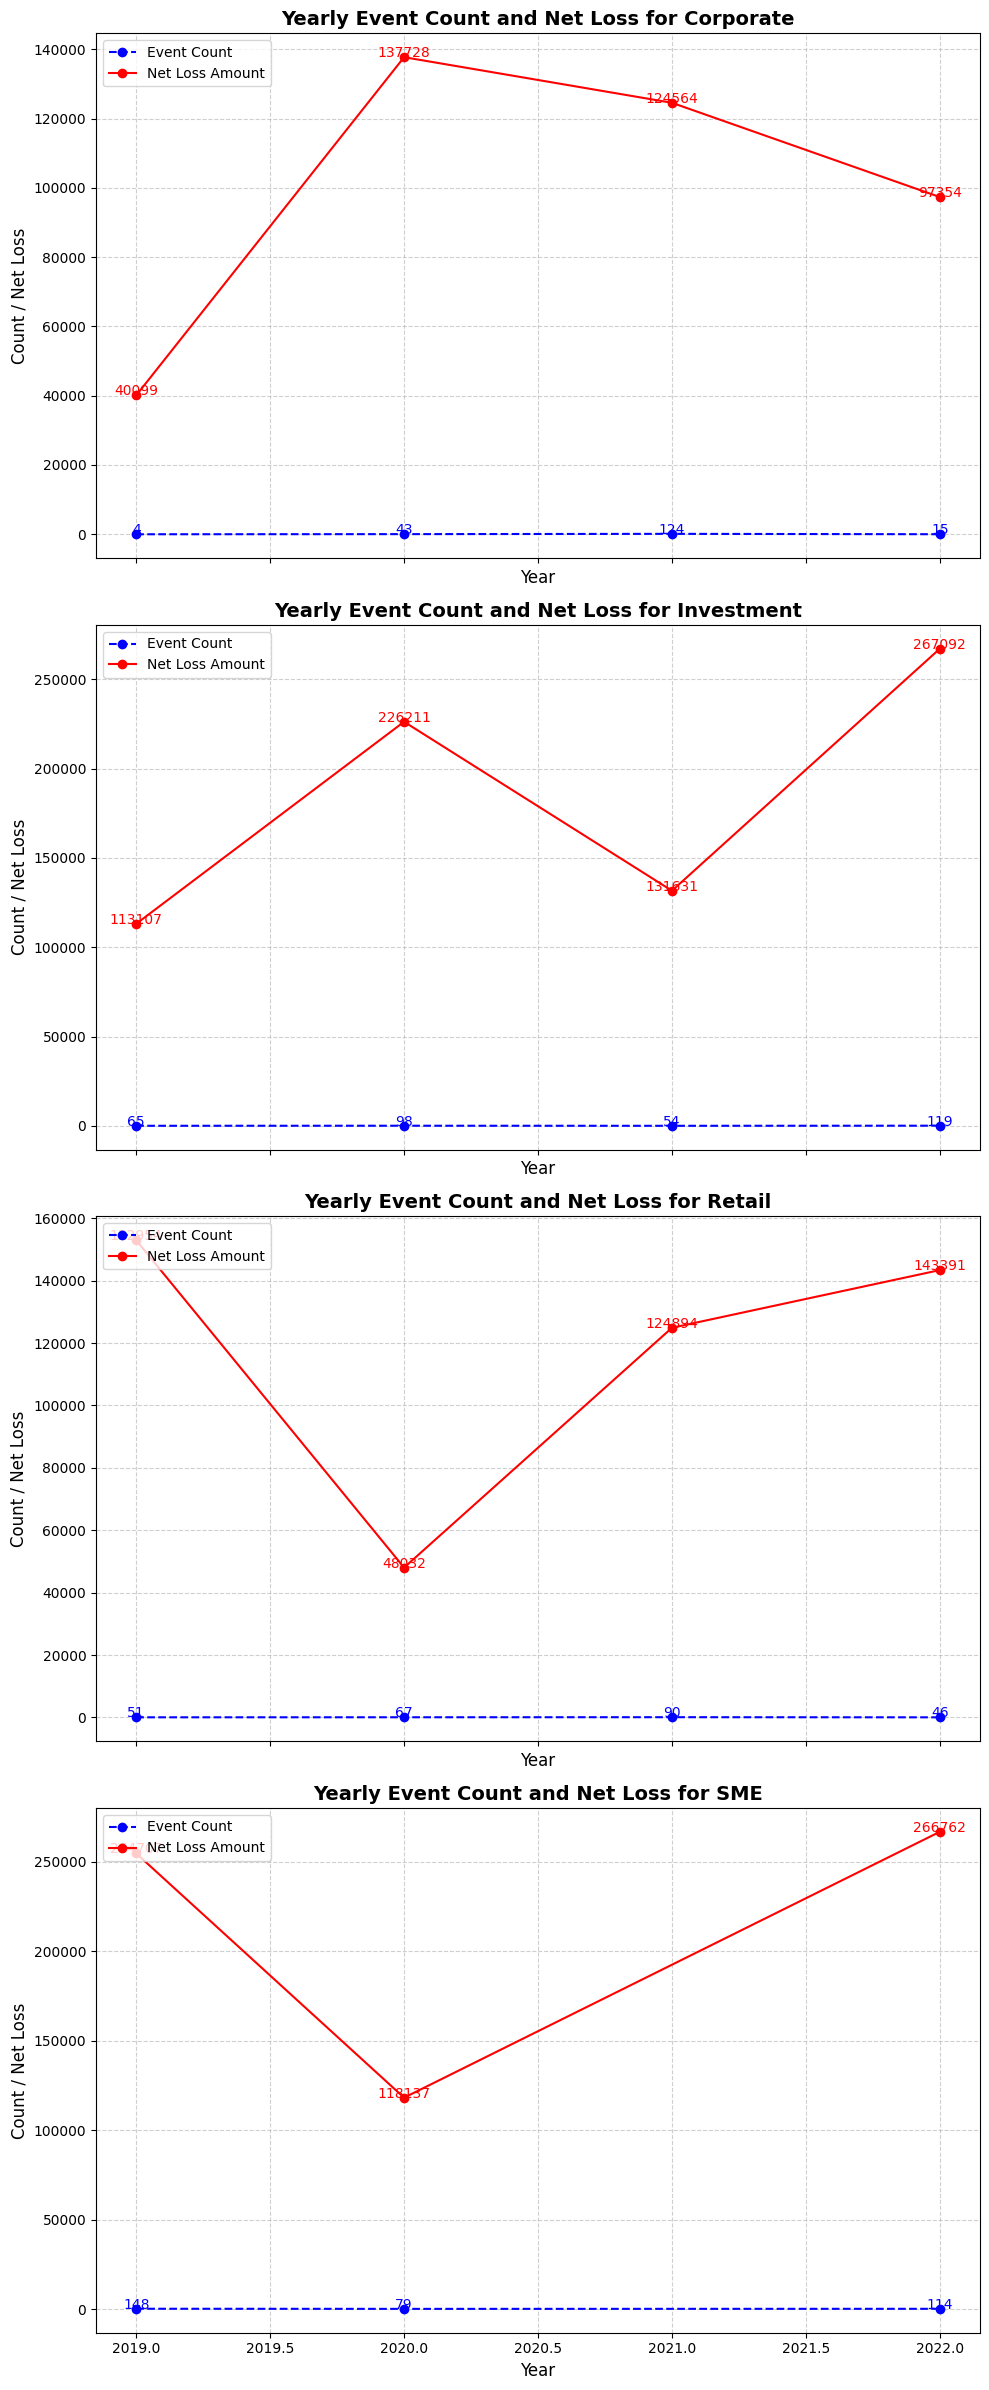

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Business Line and Year, and aggregate totals
yearly_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Get unique business lines for creating subplots
business_lines = yearly_data['Business Line'].unique()

# Set up subplots
fig, axes = plt.subplots(len(business_lines), 1, figsize=(10, 6 * len(business_lines)), sharex=True)

# Iterate through each business line and plot
for idx, business_line in enumerate(business_lines):
    ax = axes[idx]
    data = yearly_data[yearly_data['Business Line'] == business_line]
    
    # Plot Event Count
    ax.plot(
        data['Year'], data['Event Count'], marker='o', label='Event Count', color='blue', linestyle='--'
    )
    for x, y in zip(data['Year'], data['Event Count']):
        ax.text(x, y, f"{y}", color='blue', fontsize=10, ha='center')
    
    # Plot Net Loss
    ax.plot(
        data['Year'], data['Net Loss Amount'], marker='o', label='Net Loss Amount', color='red', linestyle='-'
    )
    for x, y in zip(data['Year'], data['Net Loss Amount']):
        ax.text(x, y, f"{y:.0f}", color='red', fontsize=10, ha='center')
    
    # Add titles and legends
    ax.set_title(f"Yearly Event Count and Net Loss for {business_line}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Count / Net Loss', fontsize=12)
    ax.legend(fontsize=10, loc='upper left')
    ax.grid(axis='both', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()
